In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [1]:

countries=[]
# Load the provided Excel workbook and the specific sheet
file_path = 'unwto-all-data-download_2022.xlsx'  # Update this with the correct file path
arrivals_df = pd.read_excel(file_path, sheet_name=' Inbound Tourism-Arrivals')
expenditure_df = pd.read_excel(file_path, sheet_name='Inbound Tourism-Expenditure')
# Create a new DataFrame with columns Country, Year, Tourism expenditure in
columns = ['Country', 'Year', 'Tourism arrivals', 'Tourism expenditure']
new_df = pd.DataFrame(columns=columns)

# Define the range of years from 1995 to 2022
years = list(range(1995, 2023))  # Year range

# Start a loop from row 4, checking if column D (3rd index) is empty
# loop 
for idx in range(len(arrivals_df)):
    try:
        rowArr=arrivals_df.iloc[idx]
    except IndexError as e:
        print("IndexError:", e)
        continue

    if idx < 2:  # Skip the first 3 rows
        continue
    
    # Use iloc to access values by position to avoid the FutureWarning
    if pd.isna(rowArr.iloc[3]) or pd.isna(rowArr.iloc[2]) or pd.isna(rowArr.iloc[1]) or pd.isna(rowArr.iloc[0]):
        continue
    
    # Get the country name from the current row (Column D)
    country = rowArr.iloc[3]
    #print ("|",country,"|")
    if country=='NORWAY':
        pass
    # remove leading and trailing whitespaces
    country = country.strip()
    # Get the row two rows after the current row (idx + 2)
    if (idx + 2) >= len(arrivals_df):
        break  # Avoid going out of bounds

    row_arr = arrivals_df.iloc[idx + 3]
    # select the row in the expenditure dataframe that has the same country name in column 3
    
    # get the 3rd column of the row in the expenditure dataframe
    exp_cc=expenditure_df.iloc[:,3]
    # strip all values in the column
    exp_cc=exp_cc.str.strip()
    # get the index of the country name in the expenditure dataframe
    #print ("country:",country)
    countries.append(country)
    try:
        idx_cc=exp_cc[exp_cc==country].index[0]
    except IndexError as e:
        print("IndexError:", e)
        pause
        continue
    
      
    row_exp = expenditure_df.iloc[idx_cc + 1]
    # Get the values from columns L (11th index) to AM (39th index) - 1995 to 2022
    arrivals = row_arr.iloc[11:39].values  # Extract the range
    # Convert all numeric values to NaN
    arrivals = pd.to_numeric(arrivals, errors='coerce')  # Coerce non-numeric values to NaN
        
    expenditures = row_exp.iloc[11:39].values  # Extract the range
    # Convert all numeric values to NaN
    expenditures = pd.to_numeric(expenditures, errors='coerce')  # Coerce non-numeric values to NaN
        
    # add non null values and print the total
    arr = arrivals[~pd.isnull(arrivals)]
    exp = expenditures[~pd.isnull(expenditures)]
    print("Processing data for", country, arr.sum(), exp.sum())
    
    # Insert the data for each year (1995 to 2022)
    for i, (year, arrivals, expenditures) in enumerate(zip(years, arrivals, expenditures)):
        # Use loc to add a new row to the dataframe
        # Make a dictionary with the data to insert
                
        new_df.loc[len(new_df)] = dict(zip(columns, [country, year, arrivals, expenditures]))

# Display the new DataFrame with the inserted data
#print(countries)


Processing data for AFGHANISTAN 0.0 1299.0
Processing data for ALBANIA 57222.7 36368.1
Processing data for ALGERIA 0.0 5046.900000000001
Processing data for AMERICAN SAMOA 585.1 0.0
Processing data for ANDORRA 61823.1 5154.1
Processing data for ANGOLA 6491 10329.8
Processing data for ANGUILLA 1617.2 1138.6
Processing data for ANTIGUA AND BARBUDA 6641.5 6922.0
Processing data for ARGENTINA 124432 112214.47
Processing data for ARMENIA 18362 16910.1
Processing data for ARUBA 23026.5 35630.6
Processing data for AUSTRALIA 40531.0 697731
Processing data for AUSTRIA 603552 312849.0
Processing data for AZERBAIJAN 29630.0 27783.3
Processing data for BAHAMAS 40853.4 61160
Processing data for BAHRAIN 63343.0 52535
Processing data for BANGLADESH 5555.0 3314.7
Processing data for BARBADOS 14442.9 25263.6
Processing data for BELARUS 20375.0 15764.5
Processing data for BELGIUM 192311 224243.38
Processing data for BELIZE 7288.700000000001 892.1
Processing data for BENIN 5019.0 3755.96
Processing data 

In [2]:
# Read the GDP data from the CSV file
gdp_df = pd.read_excel('GDP.xlsx')

# Convert all country names to uppercase in the GDP DataFrame
gdp_df['Country'] = gdp_df['Country or Area'].str.upper()

# Make sure the 'Year' column is also in the correct format
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'], errors='coerce')

# Add a new column for GDP in the new_df DataFrame
new_df['GDP'] = None

# Function to find substring match based on the smallest length
def is_substring_match(country1, country2):
    min_len = min(len(country1), len(country2))
    return country1[:min_len] == country2[:min_len]

# Loop through new_df to fill in the GDP data
old_country = ""
miss = 0

for idx in range(len(new_df)):
    country = new_df.iloc[idx]['Country']
    year = new_df.iloc[idx]['Year']

    # Look for the country in gdp_df
    matching_country = gdp_df[gdp_df['Country'] == country]

    # If exact match not found, perform substring match
    if matching_country.empty:
        for gdp_country in gdp_df['Country'].unique():
            if is_substring_match(country, gdp_country):
                matching_country = gdp_df[gdp_df['Country'] == gdp_country]
                break  # Stop after finding the first match

    if matching_country.empty and country != old_country:
        # If the country is not found, log the miss and continue
        print(f"Warning: Country '{country}' not found in GDP data. Pausing execution...")
        miss += 1
        old_country = country
        continue

    # Look for the GDP for the corresponding year
    matching_gdp = matching_country[matching_country['Year'] == year]

    if matching_gdp.empty:
        continue

    # If GDP is found, update the new_df with the GDP value
    new_df.at[idx, 'GDP'] = matching_gdp.iloc[0]['Value']

print("missing:", miss)
# Display the updated new_df with the added GDP values
#print(new_df)





missing: 25


In [3]:
# List of SIDS countries (Small Island Developing States)
sids_countries = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Cabo Verde', 'Comoros', 'Cook Islands', 
                  'Cuba', 'Dominica', 'Dominican Republic', 'Fiji', 'Grenada', 'Guinea-Bissau', 'Guyana', 'Haiti', 
                  'Jamaica', 'Kiribati', 'Maldives', 'Marshall Islands', 'Micronesia (Federated States of)', 
                  'Mauritius', 'Nauru', 'Niue', 'Palau', 'Papua New Guinea', 'Samoa', 'São Tomé and Príncipe', 
                  'Seychelles', 'Solomon Islands', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 
                  'Suriname', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago', 'Tuvalu', 'Vanuatu']


sids_in_all_countries = ['ANTIGUA AND BARBUDA',
 'BAHAMAS',
 'BARBADOS',
 'BELIZE',
 'CABO VERDE',
 'COMOROS',
 'COOK ISLANDS',
 'CUBA',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'FIJI',
 'GRENADA',
 'GUINEA-BISSAU',
 'GUYANA',
 'HAITI',
 'JAMAICA',
 'KIRIBATI',
 'MALDIVES',
 'MARSHALL ISLANDS',
 'MAURITIUS',
 'NAURU',
 'NIUE',
 'PALAU',
 'PAPUA NEW GUINEA',
 'SAMOA',
 'SEYCHELLES',
 'SOLOMON ISLANDS',
 'SURINAME',
 'TIMOR-LESTE',
 'TONGA',
 'TRINIDAD AND TOBAGO',
 'TUVALU',
 'VANUATU',
 'MICRONESIA, FEDERATED STATES OF',
 'SAO TOME AND PRINCIPE',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES']

# List of all countries provided by user
all_countries = ['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'AMERICAN SAMOA', 'ANDORRA', 'ANGOLA', 'ANGUILLA', 
                 'ANTIGUA AND BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 
                 'BAHAMAS', 'BAHRAIN', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 
                 'BHUTAN', 'BOLIVIA, PLURINATIONAL STATE OF', 'BONAIRE', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 
                 'BRAZIL', 'BRITISH VIRGIN ISLANDS', 'BRUNEI DARUSSALAM', 'BULGARIA', 'BURKINA FASO', 'BURUNDI', 
                 'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAYMAN ISLANDS', 'CENTRAL AFRICAN REPUBLIC', 
                 'CHAD', 'CHILE', 'CHINA', 'COLOMBIA', 'COMOROS', 'CONGO', 'CONGO, DEMOCRATIC REPUBLIC OF THE', 
                 'COOK ISLANDS', 'COSTA RICA', 'COTE D´IVOIRE', 'CROATIA', 'CUBA', 'CURAÇAO', 'CYPRUS', 
                 'CZECH REPUBLIC (CZECHIA)', 'DENMARK', 'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ECUADOR', 
                 'EGYPT', 'EL SALVADOR', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA', 'ESWATINI', 'ETHIOPIA', 'FIJI', 
                 'FINLAND', 'FRANCE', 'FRENCH GUIANA', 'FRENCH POLYNESIA', 'GABON', 'GAMBIA', 'GEORGIA', 'GERMANY', 
                 'GHANA', 'GREECE', 'GRENADA', 'GUADELOUPE', 'GUAM', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 
                 'GUYANA', 'HAITI', 'HONDURAS', 'HONG KONG, CHINA', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 
                 'IRAN, ISLAMIC REPUBLIC OF', 'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN', 
                 'KAZAKHSTAN', 'KENYA', 'KIRIBATI', 'KOREA, DEMOCRATIC PEOPLE´S REPUBLIC OF', 'KOREA, REPUBLIC OF', 
                 'KUWAIT', 'KYRGYZSTAN', 'LAO PEOPLE´S DEMOCRATIC REPUBLIC', 'LATVIA', 'LEBANON', 'LESOTHO', 
                 'LIBERIA', 'LIBYA', 'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MACAO, CHINA', 'MADAGASCAR', 
                 'MALAWI', 'MALAYSIA', 'MALDIVES', 'MALI', 'MALTA', 'MARSHALL ISLANDS', 'MARTINIQUE', 'MAURITANIA', 
                 'MAURITIUS', 'MEXICO', 'MICRONESIA, FEDERATED STATES OF', 'MOLDOVA, REPUBLIC OF', 'MONACO', 
                 'MONGOLIA', 'MONTENEGRO', 'MONTSERRAT', 'MOROCCO', 'MOZAMBIQUE', 'MYANMAR', 'NAMIBIA', 'NAURU', 
                 'NEPAL', 'NETHERLANDS', 'NEW CALEDONIA', 'NEW ZEALAND', 'NICARAGUA', 'NIGER', 'NIGERIA', 'NIUE', 
                 'NORTH MACEDONIA', 'NORTHERN MARIANA ISLANDS', 'NORWAY', 'OMAN', 'PAKISTAN', 'PALAU', 'PANAMA', 
                 'PAPUA NEW GUINEA', 'PARAGUAY', 'PERU', 'PHILIPPINES', 'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 
                 'REUNION', 'ROMANIA', 'RUSSIAN FEDERATION', 'RWANDA', 'SABA', 'SAINT KITTS AND NEVIS', 'SAINT LUCIA', 
                 'SAINT VINCENT AND THE GRENADINES', 'SAMOA', 'SAN MARINO', 'SAO TOME AND PRINCIPE', 'SAUDI ARABIA', 
                 'SENEGAL', 'SERBIA', 'SERBIA AND MONTENEGRO', 'SEYCHELLES', 'SIERRA LEONE', 'SINGAPORE', 
                 'SINT EUSTATIUS', 'SINT MAARTEN (DUTCH PART)', 'SLOVAKIA', 'SLOVENIA', 'SOLOMON ISLANDS', 'SOMALIA', 
                 'SOUTH AFRICA', 'SOUTH SUDAN', 'SPAIN', 'SRI LANKA', 'STATE OF PALESTINE', 'SUDAN', 'SURINAME', 
                 'SWEDEN', 'SWITZERLAND', 'SYRIAN ARAB REPUBLIC', 'TAIWAN PROVINCE OF CHINA', 'TAJIKISTAN', 
                 'TANZANIA, UNITED REPUBLIC OF', 'THAILAND', 'TIMOR-LESTE', 'TOGO', 'TONGA', 'TRINIDAD AND TOBAGO', 
                 'TUNISIA', 'TÜRKIYE', 'TURKMENISTAN', 'TURKS AND CAICOS ISLANDS', 'TUVALU', 'UGANDA', 'UKRAINE', 
                 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES OF AMERICA', 'UNITED STATES VIRGIN ISLANDS', 
                 'URUGUAY', 'UZBEKISTAN', 'VANUATU', 'VENEZUELA, BOLIVARIAN REPUBLIC OF', 'VIET NAM', 'YEMEN', 
                 'ZAMBIA', 'ZIMBABWE']



low_income_countries = [
    'AFGHANISTAN', 'BENIN', 'BURKINA FASO', 'BURUNDI', 'CENTRAL AFRICAN REPUBLIC', 'CHAD',
    'CONGO, DEMOCRATIC REPUBLIC OF THE', 'ERITREA', 'ETHIOPIA', 'GAMBIA', 'GUINEA', 
    'GUINEA-BISSAU', 'HAITI', 'KOREA, DEMOCRATIC PEOPLE´S REPUBLIC OF', 'LIBERIA',
    'MADAGASCAR', 'MALAWI', 'MALI', 'MOZAMBIQUE', 'NIGER', 'RWANDA', 'SIERRA LEONE', 
    'SOMALIA', 'SOUTH SUDAN', 'SUDAN', 'SYRIAN ARAB REPUBLIC', 'TOGO', 'UGANDA', 'YEMEN', 'ZAMBIA'
]

lower_middle_income_countries = [
    'ANGOLA', 'BANGLADESH', 'BHUTAN', 'BOLIVIA, PLURINATIONAL STATE OF', 'CABO VERDE', 'CAMBODIA', 'CAMEROON', 'COMOROS',
    'CONGO', 'COTE D´IVOIRE', 'DJIBOUTI', 'EGYPT', 'EL SALVADOR', 'ESWATINI', 'GHANA', 'HONDURAS', 'INDIA',
    'INDONESIA', 'KENYA', 'KYRGYZSTAN', 'LAO PEOPLE´S DEMOCRATIC REPUBLIC', 'LESOTHO', 'MAURITANIA', 
    'MICRONESIA, FEDERATED STATES OF', 'MONGOLIA', 'MOROCCO', 'MYANMAR', 'NEPAL', 'NICARAGUA', 'NIGERIA', 
    'PAKISTAN', 'PAPUA NEW GUINEA', 'PHILIPPINES', 'SENEGAL', 'SRI LANKA', 'TAJIKISTAN', 'TANZANIA, UNITED REPUBLIC OF',
    'TIMOR-LESTE', 'TUNISIA', 'UKRAINE', 'UZBEKISTAN', 'VANUATU', 'VIET NAM', 'ZIMBABWE', 'KIRIBATI','SAMOA',
    'SAO TOME AND PRINCIPE', 'SOLOMON ISLANDS',
]

upper_middle_income_countries = [
    'ALBANIA', 'ALGERIA', 'ARGENTINA', 'ARMENIA', 'AZERBAIJAN', 'BELARUS', 'BOSNIA AND HERZEGOVINA', 'BELIZE', 'BOTSWANA', 'BRAZIL',
    'CHINA', 'COLOMBIA', 'COSTA RICA', 'CROATIA', 'CUBA', 'DOMINICAN REPUBLIC', 'ECUADOR', 'FIJI', 'GABON',
    'GEORGIA', 'GRENADA', 'GUATEMALA', 'GUYANA', 'IRAQ', 'JAMAICA', 'JORDAN', 'KAZAKHSTAN', 'LEBANON', 'LIBYA',
    'MALAYSIA', 'MALDIVES', 'MAURITIUS', 'MEXICO', 'MOLDOVA, REPUBLIC OF', 'MONTENEGRO', 'NAMIBIA', 
    'NORTH MACEDONIA', 'PARAGUAY', 'PERU', 'RUSSIAN FEDERATION', 'SERBIA', 'SOUTH AFRICA', 'SURINAME', 
    'THAILAND', 'TRINIDAD AND TOBAGO', 'TÜRKIYE', 'VENEZUELA, BOLIVARIAN REPUBLIC OF', 'DOMINICA', 'EQUATORIAL GUINEA', 'IRAN, ISLAMIC REPUBLIC OF', 'MARSHALL ISLANDS',
    'SAINT LUCIA', 'SAINT VINCENT AND THE GRENADINES', 'SERBIA AND MONTENEGRO', 'TONGA', 'TURKMENISTAN', 'TUVALU'
    ]

other_countries_a_mix = [
    'AMERICAN SAMOA', 'ANDORRA', 'ANGUILLA', 'ANTIGUA AND BARBUDA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 
    'BAHAMAS', 'BAHRAIN', 'BARBADOS', 'BELGIUM', 'BERMUDA', 'BONAIRE', 'BRITISH VIRGIN ISLANDS', 
    'BRUNEI DARUSSALAM', 'CANADA', 'CAYMAN ISLANDS', 'CYPRUS', 'CZECH REPUBLIC (CZECHIA)', 'DENMARK', 
    'FINLAND', 'FRANCE', 'FRENCH GUIANA', 'FRENCH POLYNESIA', 'GERMANY', 'GREECE', 'GUADELOUPE', 'GUAM', 
    'HONG KONG, CHINA', 'HUNGARY', 'ICELAND', 'IRELAND', 'ISRAEL', 'ITALY', 'JAPAN', 'KOREA, REPUBLIC OF', 
    'KUWAIT', 'LATVIA', 'LIECHTENSTEIN', 'LITHUANIA', 'LUXEMBOURG', 'MACAO, CHINA', 'MALTA', 'MONACO', 
    'NETHERLANDS', 'NEW CALEDONIA', 'NEW ZEALAND', 'NORWAY', 'OMAN', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 
    'REUNION', 'SAN MARINO', 'SAUDI ARABIA', 'SINGAPORE', 'SINT EUSTATIUS', 'SINT MAARTEN (DUTCH PART)', 
    'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN', 'SWITZERLAND', 'TAIWAN PROVINCE OF CHINA', 
    'TURKS AND CAICOS ISLANDS', 'UNITED ARAB EMIRATES', 'UNITED KINGDOM', 'UNITED STATES OF AMERICA', 
    'UNITED STATES VIRGIN ISLANDS', 'URUGUAY', 'BULGARIA','CHILE', 'CURAÇAO', 'ESTONIA','COOK ISLANDS', 
    'MARTINIQUE', 'MONTSERRAT', 'NAURU', 'NIUE', 'NORTHERN MARIANA ISLANDS', 'PALAU', 'PANAMA', 'POLAND', 'ROMANIA', 'SABA', 'SAINT KITTS AND NEVIS','SEYCHELLES','STATE OF PALESTINE'  
]
# ensure that last three lists have all the countries in the all_countries list and only those countries
# that are not in the low_income_countries, lower_middle_income_countries, and upper_middle_income_countries lists
other_countries = [country for country in all_countries if country not in low_income_countries + lower_middle_income_countries + upper_middle_income_countries]
if len(other_countries) == len(other_countries_a_mix):
    print("The lists are equal")
else:
    print("Warning: The lists are not equal")
# print length of sids_in_all_countries
print("SIDS : ", len(sids_in_all_countries))

The lists are equal
SIDS :  38


In [20]:
# create a new column Tourism expenditure over GDP
new_df['Tourism expenditure over GDP'] = new_df['Tourism expenditure'] / new_df['GDP']*1.e6

In [22]:
NORMYEAR=1995



# Adding a column to classify countries by group
def classify_country(country):
    if country in low_income_countries:
        return 'Low Income'
    elif country in lower_middle_income_countries:
        return 'Lower Middle Income'
    elif country in upper_middle_income_countries:
        return 'Upper Middle Income'
    else:
        return 'Other'

# Classify the countries and create a subset for SIDS countries
new_df['Group'] = new_df['Country'].apply(classify_country)
sids_data = new_df[new_df['Country'].isin(sids_in_all_countries)]
sids_data['Group'] = 'SIDS'
# Concatenate the original dataframe and the SIDS data
all_data = pd.concat([new_df, sids_data])

# Calculate the average for each group per year
grouped_df = all_data.groupby(['Group', 'Year']).agg({
    'Tourism arrivals': 'mean',
    'Tourism expenditure': 'mean',
    'GDP': 'mean',
    'Tourism expenditure over GDP': 'mean',
}).reset_index()

# Renaming columns as required
grouped_df.columns = ['Group', 'Year', 'Average Tourism arrivals (persons)', 'Average Tourism expenditure (US$ mil.)', 'GDP', 'Tourism expenditure over GDP']

# Get the values for the year 1995 to normalize the data
norm_year = grouped_df[grouped_df['Year'] == NORMYEAR]

# Normalize the data by dividing each value by the value for 1995
grouped_df[f'Average Tourism arrivals (persons) (normalized for year {NORMYEAR})'] = grouped_df.apply(
    lambda row: row['Average Tourism arrivals (persons)'] / 
    norm_year[norm_year['Group'] == row['Group']]['Average Tourism arrivals (persons)'].values[0] 
    if not norm_year[norm_year['Group'] == row['Group']].empty else None, axis=1)

grouped_df[f'Average Tourism expenditure (normalized for year {NORMYEAR})'] = grouped_df.apply(
    lambda row: row['Average Tourism expenditure (US$ mil.)'] / 
    norm_year[norm_year['Group'] == row['Group']]['Average Tourism expenditure (US$ mil.)'].values[0] 
    if not norm_year[norm_year['Group'] == row['Group']].empty else None, axis=1)



C:\Users\apa\AppData\Local\Temp\ipykernel_30224\2473836803.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sids_data['Group'] = 'SIDS'


In [26]:
# remove the rows with Type = Other
grouped_df = grouped_df[grouped_df['Group'] != 'Other']
grouped_df.columns

Index(['Group', 'Year', 'Average Tourism arrivals (persons)',
       'Average Tourism expenditure (US$ mil.)', 'GDP',
       'Tourism expenditure over GDP',
       'Average Tourism arrivals (persons) (normalized for year 1995)',
       'Average Tourism expenditure (normalized for year 1995)'],
      dtype='object')

c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: us

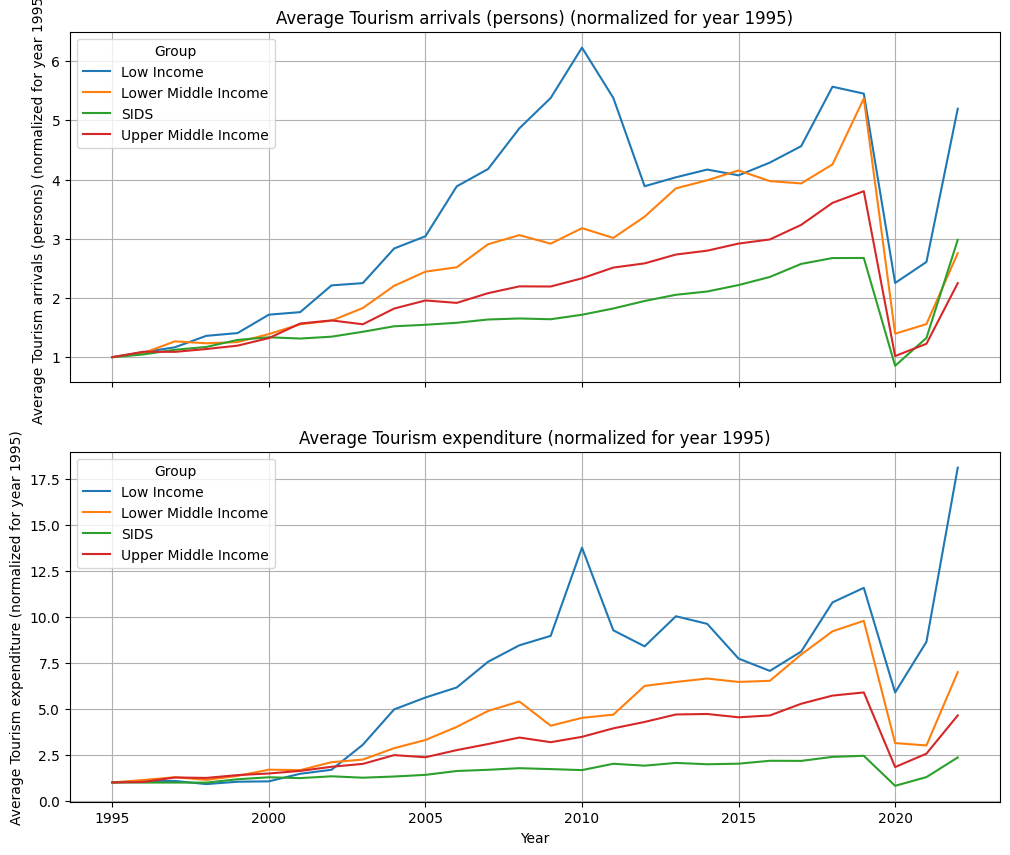

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [28]:
# Plot the data for the selected country
# make two plot with common x-axis
# Create a figure with two subplots (one below the other) with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
for i,type in enumerate([grouped_df.columns[6], grouped_df.columns[7]]):
    plt.figure(figsize=(12, 6))
    ax=axes[i]
    sns.lineplot(ax=ax,data=grouped_df, x=grouped_df.columns[1], y=type, hue='Group')
    ax.set_title(type)
    ax.set_xlabel('Year')
    ax.set_ylabel(type)
    ax.grid(True)



c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\_NO_INSTALL\python\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([<matplotlib.axis.XTick at 0x1d91340d690>,
 [Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022')])

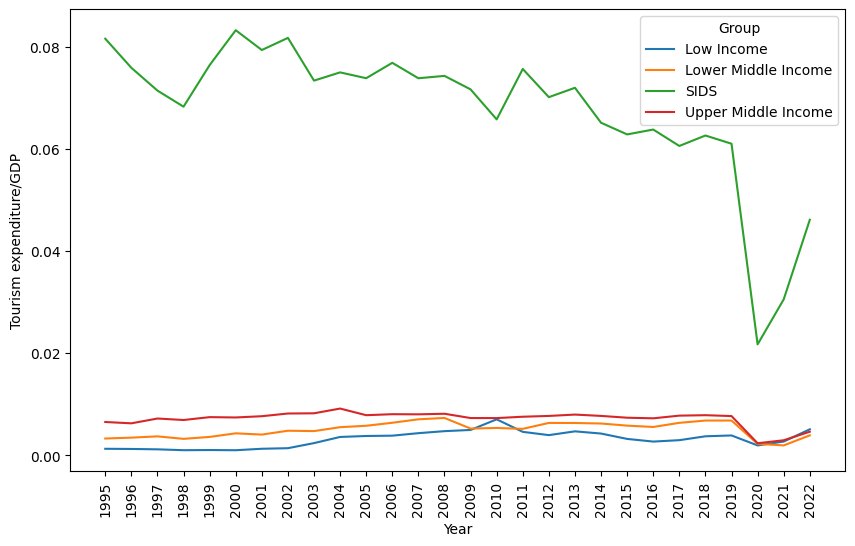

In [38]:
# add a new column Tourism expenditure GDP ratio
grouped_df['Tourism expenditure/GDP'] = grouped_df['Average Tourism expenditure (US$ mil.)'] / grouped_df['GDP']*1e6
# PLOT the data against time with hue as group
# size
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Year', y='Tourism expenditure/GDP', hue='Group')
# x ticks every year rotate 90 degrees
plt.xticks(rotation=90)
plt.xticks(np.arange(1995, 2023, 1))